# Chemical Oceanography (CO)

<img src="rosette-launch.jpeg"/>


This tutorial is part of our Chemical Oceanography day. It demonstrates how to do basic analysis and visualization of chemical element observations in the ocean. We will use Hawaii Ocean Time-series (HOT) data that can be downloaded using CMAP API: https://simonscmap.com/catalog/datasets/HOT_Bottle_ALOHA. To download the data using API, please register at CMAP and generate your API key https://simonscmap.com/. 

### Estimated tutorial time: 1.5 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
- CO knowledge
    - Learn about the distribution of nutrients in the ocean 
    - Understand the acidification and deoxygenation in the ocean
    - Explore the Redfield ratio
    
## Reading 

https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification


Gruber, N., & Deutsch, C. A. (2014). Redfield's evolving legacy. Nature Geoscience, 7(12), 853-855. https://www.nature.com/articles/ngeo2308

Moore, C. M., Mills, M. M., Arrigo, K. R., Berman-Frank, I., Bopp, L., Boyd, P. W., ... & Ulloa, O. (2013). Processes and patterns of oceanic nutrient limitation. Nature geoscience, 6(9), 701-710. https://www.nature.com/articles/ngeo1765


# Let's start!

In [25]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

### Using CMAP's API to query datasets

#### Get your personal API key by registering for account on simonscmap.com then going to https://simonscmap.com/apikeymanagement
#### Create a file .cmap_key in your home directory and save the API key there

In [166]:
key =!tail "$HOME/$usr/.cmap_key"    # reading the last line from a file using a system command
api = pycmap.API(token=key[0])       # call api using your unique API key

In [3]:
# get catalog of all datasets- very long
# api.get_catalog()

# search for a dataset with a specific keyword
# api.search_catalog('carbon')

### HOT: Hawaii Ocean Time-series

In [167]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')
HOT_bottle.keys()

Index(['botid_HOT', 'time', 'date_time', 'pressure_ctd_bottle_hot',
       'potential_temperature_ctd_bottle_hot',
       'potential_density_ctd_bottle_hot', 'temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'oxygen_ctd_bottle_hot',
       'salinity_bottle_hot', 'oxygen_bottle_hot', 'dic_bottle_hot',
       'ph_bottle_hot', 'alk_bottle_hot', 'PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot', 'dop_bottle_hot',
       'don_bottle_hot', 'doc_bottle_hot', 'tdp_bottle_hot', 'tdn_bottle_hot',
       'pc_bottle_hot', 'pn_bottle_hot', 'pp_bottle_hot', 'lln_bottle_hot',
       'llp_bottle_hot', 'chl_bottle_hot', 'phaeo_bottle_hot',
       'HPLC_chl3_bottle_hot', 'HPLC_chl12_bottle_hot',
       'HPLC_chlplus_bottle_hot', 'HPLC_peridinin_bottle_hot',
       'HPLC_but19_bottle_hot', 'HPLC_fuco_bottle_hot',
       'HPLC_hex19_bottle_hot', 'HPLC_prasino_bottle_hot',
       'HPLC_diadino_bottle_hot', 'HPLC_zeaxan_bottle_hot',
       'HPLC_chlb_bottle_hot', 'HPLC_chla_bott

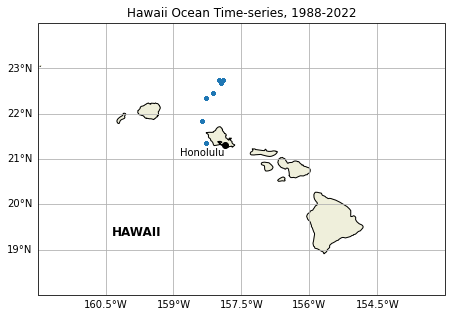

In [168]:
Lon_Honolulu=360-157.8581; Lat_Honolulu=21.3099

plt.figure(figsize=(15,5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)); #this specifies which projection to use
ax.set_extent(( 198,207, 18,24), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)

ax.scatter(HOT_bottle['lon'],HOT_bottle['lat'],5,transform=ccrs.PlateCarree())
plt.title('Hawaii Ocean Time-series, 1988-2022')
ax.plot(Lon_Honolulu,Lat_Honolulu, 'ko', alpha=1,transform=ccrs.PlateCarree())

plt.text(Lon_Honolulu-1,Lat_Honolulu-0.25,      # add a text label
         'Honolulu',transform=ccrs.PlateCarree())

plt.text(Lon_Honolulu-2.5,Lat_Honolulu-2,      # add a text label
         'HAWAII',weight="bold", fontsize=12, transform=ccrs.PlateCarree());
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#plt.axis("off");

## Ocean acidification

<img src="acidification.jpeg"/>

https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification


What is commonly referred to as "acidity" is the concentration of hydrogen ions (H+) in an aqueous solution. The concentration of hydrogen ions is expressed on a logarithmic pH scale scale. Many natural processes affect acidity levels in the environment, including photosynthesis and respiration, so the acidity may vary dramatically as a result of natural biological, physical, and geological processes on a variety of different spatial and temporal scales. 

Ocean acidification, related to the uptake of CO2 at the ocean surface, causes a relatively slow, long-term increase in the acidity of the ocean, corresponding to a decrease in pH. Many organisms are very sensitive to seemingly small changes in pH. https://www.pmel.noaa.gov/co2/story/A+primer+on+pH





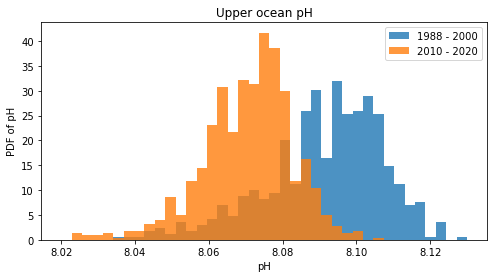

In [169]:
plt.figure(figsize=(8,4))

ind1=(HOT_bottle['time'] < '2000') & (HOT_bottle['depth'] <100)
plt.hist(HOT_bottle[ind1]['ph_bottle_hot'], 
         bins=np.linspace(8.02, 8.13, 40), density=True, alpha=0.8, 
         label='1988 - 2000');

ind2=(HOT_bottle['time'] > '2010') &(HOT_bottle['depth'] <100)
plt.hist(HOT_bottle[ind2]['ph_bottle_hot'], 
         bins=np.linspace(8.02, 8.13, 40),  density=True,alpha=0.8,
         label='2010 - 2020');

plt.legend()
plt.title('Upper ocean pH')
plt.xlabel('pH')
plt.ylabel('PDF of pH');
plt.savefig('Acidification.pdf');

## In-class exercise \#1: Ocean Deoxygenation

Oxygen is input into the ocean at the surface, through the processes of photosynthesis by phytoplankton and mixing with the atmosphere. However, organisms, both microbial and multicellular, use oxygen in respiration throughout the entire depth of the ocean, so when the supply of oxygen from the surface is less than the utilization of oxygen in deep water, oxygen loss occurs. This phenomenon is natural, but is exacerbated with increased stratification and/or temperature. Stratification occurs when water masses with different properties, primarily temperature and salinity, are layered, with lower density water on top of higher density water. The larger the differences in the properties between layers, the less mixing occurs between the layers. Stratification is increased when the temperature of the surface ocean or the amount of freshwater input into the ocean from rivers and ice melt increases, enhancing ocean deoxygenation by limiting supply. Another factor that can limit supply is the solubility of oxygen. As temperature and salinity increase, the solubility of oxygen decreases, meaning that less oxygen can be dissolved into water as it warms and becomes more salty.

Ocean deoxygenation is an additional stressor on marine life, posing a threat to fish and other types of marine life, as well as to people who depend on marine life for nutrition or livelihood. Total ocean oxygen content has decreased by 1-2% since 1960. https://en.wikipedia.org/wiki/Ocean_deoxygenation



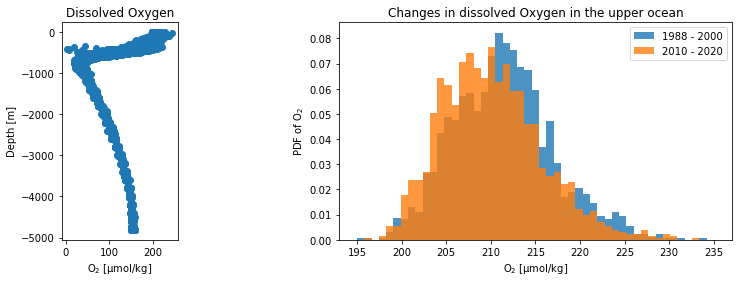

In [170]:
#Solution
plt.figure(figsize=(12,4))

plt.subplot(1,5,1)
plt.scatter(HOT_bottle['oxygen_bottle_hot'],-HOT_bottle['depth'])
plt.xlabel('O$_2$ [µmol/kg]')
plt.ylabel('Depth [m]')
plt.title('Dissolved Oxygen')


plt.subplot(1,5,(3,5))

plt.hist(HOT_bottle[ind1]['oxygen_bottle_hot'], 
          density=True,
          bins=np.linspace(195, 235, 50), 
          alpha=0.8, label='1988 - 2000');

plt.hist(HOT_bottle[ind2]['oxygen_bottle_hot'], 
         density=True,
         bins=np.linspace(195, 235, 50), 
         alpha=0.8, label='2010 - 2020');

plt.legend()
plt.title('Changes in dissolved Oxygen in the upper ocean')
plt.xlabel('O$_2$ [µmol/kg]')
plt.ylabel('PDF of O$_2$');
#plt.savefig('Deoxygenation.pdf');

In [171]:
O2_fractional_change=HOT_bottle[ind2]['oxygen_bottle_hot'].mean()/HOT_bottle[ind1]['oxygen_bottle_hot'].mean()-1
O2_fractional_change=np.fix(O2_fractional_change*1e4)/100 #expressing the change in per cent and keeping just two significant digits 
print('Dissolved Oxygen change from 1988-2000 to 2010-2020 was',O2_fractional_change, '%')

Dissolved Oxygen change from 1988-2000 to 2010-2020 was -0.64 %


## Nutrients and their deplition at the surface of the ocean

Phytoplankton require a suite of chemicals, and those with the potential to be scarce in surface waters are typically identified as "nutrients." Calcium is an example of an element that is rapidly assimilated by some plankton (for production of calcium carbonate "hard parts") but is not typically considered a nutrient because of its uniformly high concentration in seawater. Dissolved inorganic carbon, which is the feedstock for organic carbon production by photosynthesis, is also abundant and so is not typically listed among the nutrients. However, its acidic form dissolved CO$_2$ is often at adequately low concentrations to affect the growth of at least some phytoplankton.

Sigman, D. M. & Hain, M. P. (2012) The Biological Productivity of the Ocean. Nature Education Knowledge 3(10):21 https://www.nature.com/scitable/knowledge/library/the-biological-productivity-of-the-ocean-70631104/

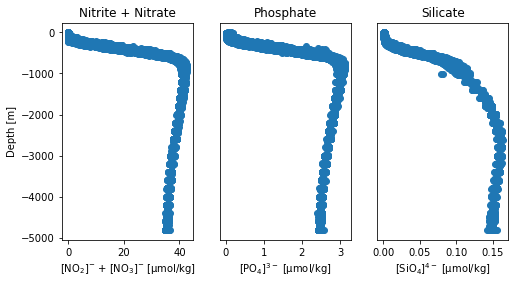

In [183]:
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.scatter(HOT_bottle['NO2_NO3_bottle_hot'],-HOT_bottle['depth'])
plt.xlabel('[NO$_2$]$^{-}$ + [NO$_3$]$^{-}$ [µmol/kg]')
plt.ylabel('Depth [m]')
plt.title('Nitrite + Nitrate')

plt.subplot(1,3,2)
plt.scatter(HOT_bottle['PO4_bottle_hot'],-HOT_bottle['depth'])
plt.xlabel('[PO$_4$]$^{3-}$ [µmol/kg]')
plt.title('Phosphate')
plt.yticks([])

plt.subplot(1,3,3)
plt.scatter(HOT_bottle['SiO4_bottle_hot']/1e3,-HOT_bottle['depth'])
plt.xlabel('[SiO$_4$]$^{4-}$ [µmol/kg]');
plt.title('Silicate')
plt.yticks([]);
plt.savefig('Nutrients.png')

Note how these elements are depleted to near-zero values near the surface of the ocean - why is that?

## Redfield Ratio 

<img src="CNP.png" width=600/>

The Redfield ratio is the consistent atomic ratio of carbon, nitrogen and phosphorus found in marine phytoplankton and throughout the deep oceans. It defines the stoichiometry of photosynthesis and remineralization reactions.

The term is named for American oceanographer Alfred C. Redfield who in 1934 first described the relatively consistent ratio of nutrients in marine biomass samples collected across several voyages on board the research vessel Atlantis, and empirically found the ratio to be C:N:P = 106:16:1. While deviations from the canonical 106:16:1 ratio have been found depending on phytoplankton species and the study area, the Redfield ratio has remained an important reference to oceanographers studying nutrient limitation. A 2014 paper summarizing a large data set of nutrient measurements across all major ocean regions spanning from 1970 to 2010 reported the global median C:N:P to be 163:22:1. https://en.wikipedia.org/wiki/Redfield_ratio


Considering only the more numerous and important of the chemical elements in the average recipe for phytoplankton, this leads to an idealized chemical reaction for the formation of phytoplankton: 

$106 CO_2 + 16 HNO_3 + H_3PO_4 + 78H_2O \rightleftarrows  (C_{106}H_{175}O_{42}N_{16}P) + 150 O_2.$

The term in parentheses is a simplified average formula for phytoplankton. This equation contains a two-way arrow because the reaction is reversible. The reverse reaction is the remineralization of phytoplankton, brought about by several processes. Nutrients leak back into the environment due to cell breakage during grazing, lysis of cells infected by viruses, decay and lysis of cells attacked by bacteria, excretion of digestive waste products, etc. https://www.sciencedirect.com/science/article/pii/B012227430X002713

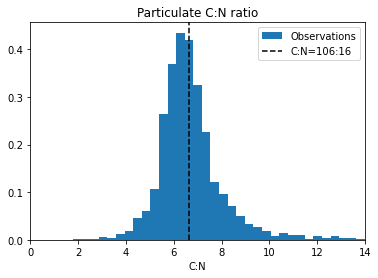

In [173]:
plt.figure(figsize=(6,4))

plt.hist(HOT_bottle['pc_bottle_hot']/HOT_bottle['pn_bottle_hot'],
         bins=np.linspace(0,14,40),density=True,
         label='Observations');
plt.axvline(106/16,linestyle='--',color='k',label='C:N=106:16')
plt.legend()
plt.title('Particulate C:N ratio')
plt.xlabel('C:N')

plt.xlim((0,14));

## In-class exercise \#2: Nitrogen-to-Phosphorus ratio (N:P)

Following the example above, calculate the Nitrogen-to-Phosphorus ratio (N:P) and plot it as a histogram. Does it match Redfield's ratio of 16:1?

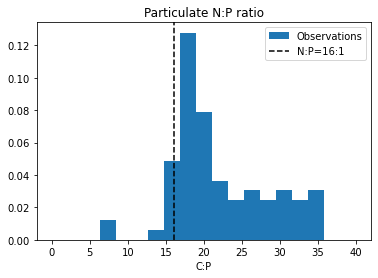

In [174]:
#Solution
plt.figure(figsize=(6,4))

plt.hist(HOT_bottle['pn_bottle_hot']/(1e-3*HOT_bottle['pp_bottle_hot']),
         label='Observations',
         bins=np.linspace(0,40,20),density=True);
plt.axvline(16,linestyle='--',color='k',label='N:P=16:1')
plt.legend()
plt.xlabel('C:P')
plt.title('Particulate N:P ratio');

# Seasonal cycle 

## Explore there seasonality in surface termperature

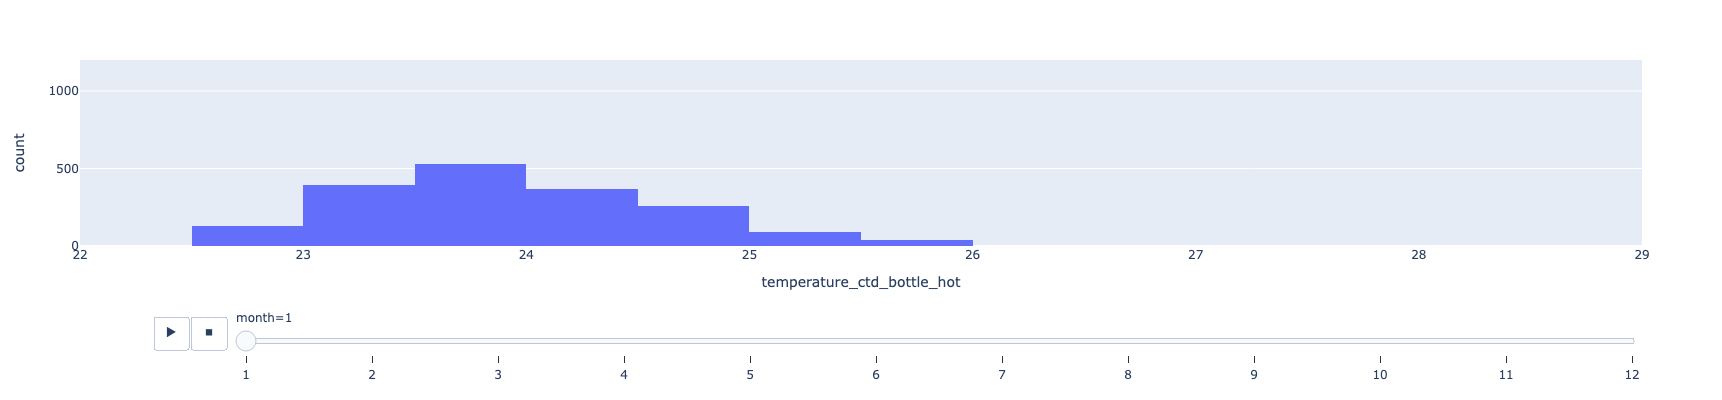

In [175]:
HOT_bottle['month'] = pd.DatetimeIndex(HOT_bottle['time']).month # create a new variable 'month'

ind=(HOT_bottle['depth']<50)  # consider surface data only

fig = px.histogram(HOT_bottle[ind].sort_values(by='month'),
                     x='temperature_ctd_bottle_hot',
                     nbins=15,
                     range_y=[0, 1200],
                     range_x=[22, 29],
                     height=400, width=600, 
                     animation_frame="month");
fig.show()

## In-class exercise \#3: Climatology (seasonal cycle)

Calculate the climatological seasonal cycle in temperature and nutrients

### Instructions:
 - subsample the data using near-surface depths, e.g., HOT_bottle['depth']<50

 - To calculate the climatology, group the dataframe variables by month using the __.goupby('month')__ operation and then take an average using __.mean()__
 - Make a scatter plot of month vs temperature and add the climatology figure to it
 - Define a function makes the seasonal cycle  plot of a variable from the dataframe given its name as an argument
 - Use the plotting function to explore different variables

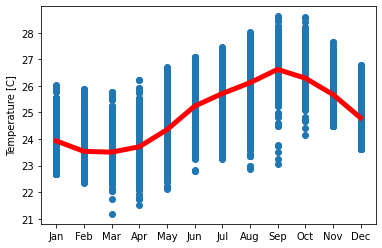

In [176]:
#Solution

ind=(HOT_bottle['depth']<50)

surface_climatology=HOT_bottle[ind].groupby('month').mean()    #group by month and average to calculate the climatology

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.scatter(HOT_bottle[ind]['month'],HOT_bottle[ind]['temperature_ctd_bottle_hot']);
plt.plot(surface_climatology['temperature_ctd_bottle_hot'],'r',linewidth=5)
plt.xticks(np.arange(1,13), months)
plt.ylabel('Temperature [C]');

In [177]:
def plot_seasonal(var_name):
    plt.scatter(HOT_bottle[ind]['month'],HOT_bottle[ind][var_name]);
    plt.plot(surface_climatology[var_name],'r',linewidth=5)
    plt.xticks(np.arange(1,13), months);
    plt.ylabel(var_name);

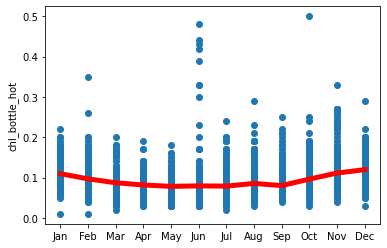

In [178]:
plot_seasonal('chl_bottle_hot')

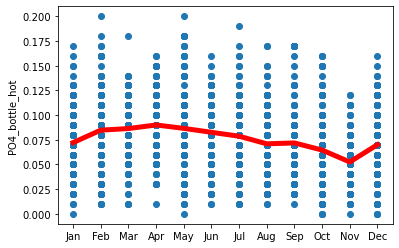

In [179]:
plot_seasonal('PO4_bottle_hot')

# np.isnan(Take_home_exercise)
True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_url_string = "https://hahana.soest.hawaii.edu/FTP/hot/ctd/hot-325/h325a0101.ctd"

ctd_data = pd.read_csv(data_url_string, skiprows=6, sep='\s+', header=None)

In [5]:
name_dict = {0:"pressure", 1:"temperature", 2:"salinity", 3:"oxygen", 
             4:"nitrate", 5:"chlorophyll", 6:"nobs", 7:"quality"}
ctd_data = ctd_data.rename(columns=name_dict)

column_list_to_drop = ["nobs", "quality"]
ctd_data = ctd_data.drop(columns=column_list_to_drop)

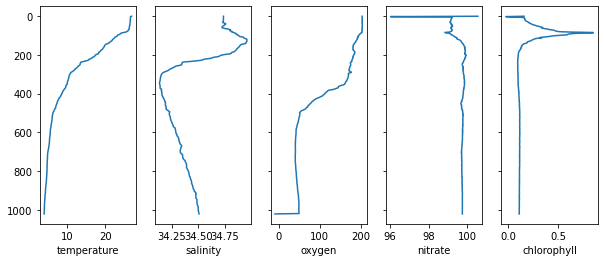

In [6]:
cols=ctd_data.keys()[1:]

fig, axs=plt.subplots(1,len(cols),figsize=(10, 4))
for j in np.arange(len(cols)):
  axs[j].plot(ctd_data[cols[j]],ctd_data['pressure'])
  axs[j].set_xlabel(cols[j])
  axs[j].invert_yaxis()
  if j>0: axs[j].set_yticklabels([]);